## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [2]:
dataset = pd.read_csv('datasets_228_482_diabetes.csv')
dataset.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


## Data cleaning & processing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.isna().sum().sum()

0

In [5]:
dataset.duplicated().sum()

0

In [6]:
dataset.shape

(768, 9)

## Exploratory Data Analysis

In [10]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
dataset['Outcome'].nunique()

2

In [12]:
dataset['Outcome'].unique()

array([1, 0], dtype=int64)

In [16]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Split the data

In [18]:
predictors = dataset.drop('Outcome' ,axis=1)
label = dataset['Outcome']

In [19]:
predictors.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Naive Bayes formula

<img src='1_UNA4yZYgRgSsgGscKxEx2Q.png' height='500' width='400'>

## Model Build and Traning

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [35]:
accuracies = []

for i in range(100):
    Xtrain,Xtest,ytrain,ytest = train_test_split(predictors,label,test_size=0.2,random_state=i)
    GNB = GaussianNB()
    GNB.fit(Xtrain,ytrain)
    accuracies.append(GNB.score(Xtest,ytest))  

In [45]:
print(f'Best Accuracy: {max(accuracies) * 100}%')
print("Best Random state:",np.argmax(accuracies))

Best Accuracy: 82.46753246753246%
Best Random state: 16


In [38]:
predict = GNB.predict(Xtest)
predict

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [39]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Compare between predict & Target value

In [43]:
df2 = pd.DataFrame(np.c_[ytest,predict],columns=['Outcome','predict'])

In [44]:
df2

,Outcome,predict
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
149,0,0
150,0,0
151,0,0
152,1,1


## Comparison graph

<AxesSubplot:title={'center':'Compare between original value and target value'}, ylabel='Density'>

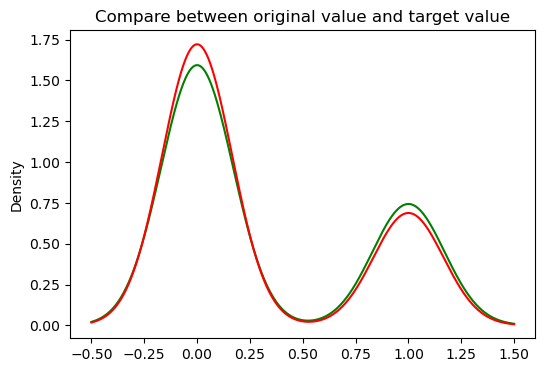

In [48]:
plt.figure(figsize=(6,4))
plt.title('Compare between original value and target value')

df2['Outcome'].plot(kind='kde',color='green')
df2['predict'].plot(kind='kde',color='red')